In [18]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
from pytesseract import Output

In [15]:
# Function to show images.
def show_image(file, size):
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=size)
    plt.imshow(image)
    plt.axis("off")

In [39]:
# Creates the black boxes around the words.
def create_box(osd_dictionary, image, color = (0, 0, 0)):
    x = osd_dictionary["left"][i]
    y = osd_dictionary["top"][i]
    w = osd_dictionary["width"][i]
    h = osd_dictionary["height"][i]

    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)

    return x, y, image


(-0.5, 992.5, 592.5, -0.5)

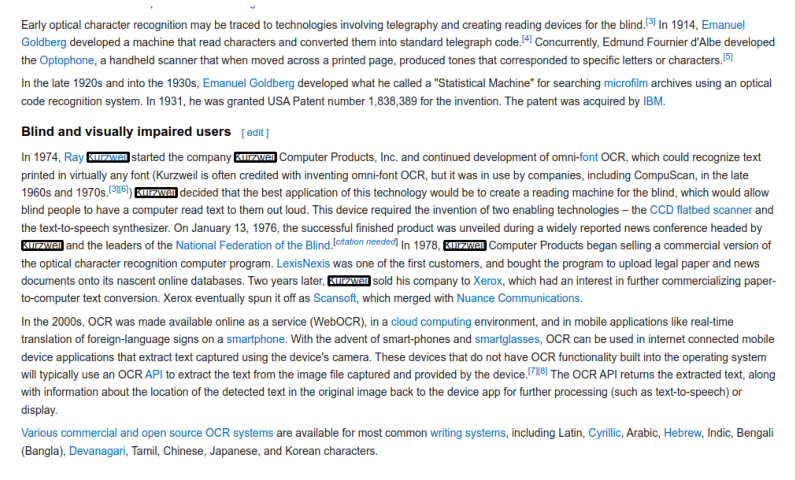

In [58]:
# Example: Searching for the word "Kurzweil"
image = cv2.imread("wikipediaExample.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

copy = image.copy()
ocd_dictionary = pytesseract.image_to_data(copy, lang='eng', output_type=Output.DICT)

for i in range(len(ocd_dictionary['text'])):
    confidence = int(ocd_dictionary['conf'][i])
    text = ocd_dictionary['text'][i]
    if confidence > 40 and text == "Kurzweil":
        create_box(ocd_dictionary, copy)

plt.figure(figsize=(14, 10))
plt.imshow(copy)
plt.axis("off")